In [1]:
import pandas as pd
import numpy as np
import pyreadr
from scipy.spatial import distance
from tqdm import tqdm

import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

In [2]:
df_full = pd.read_csv('/Users/annieulichney/Documents/GitHub/Deforestation/FinalData/FinalData2004.csv')

In [3]:
for year in [ 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    filename = f'/Users/annieulichney/Documents/GitHub/Deforestation/FinalData/FinalData{str(year)}.csv'
    df_full = pd.concat([df_full, pd.read_csv(filename)])

In [4]:
def drop_conditional(cols_list, df):
    for col in cols_list:
        if col in df.columns:
            df = df.drop(col, axis = 1)
    return df

In [5]:
#df_full = drop_conditional(['Unnamed: 0', 'ID', ], df_full)

In [6]:
df_full.shape

(2133501, 216)

In [7]:
df_full.ID

0         1100015.0
1         1100015.0
2         1100015.0
3         1100015.0
4         1100015.0
            ...    
160553    5108956.0
160554    5108956.0
160555    5108956.0
160556    5108956.0
160557    5108956.0
Name: ID, Length: 2133501, dtype: float64

In [8]:
#should year be in it? 

In [9]:
X_cols  = ['year', 'rain1', 'elevation', 'slope', 'aspect', 'near_mines',
       'near_roads', 'near_hidrovia', 'indigenous_homol',
       'mun_election_year', 'new_forest_code', 'lula', 'dilma', 'temer',
       'bolsonaro', 'fed_election_year', 'populacao', 'pib_pc', 'ironore',
       'silver', 'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs',
       'mining_jobs', 'public_jobs', 'construction_jobs', 'PIB',
       'n_companies_PUBLIC ADMIN', 'n_companies_AGRICULTURE',
       'n_companies_FOOD AND DRINKS', 'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD',
       'n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_HEALTH',
       'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION',
       'n_companies_RETAIL', 'n_companies_COMPUTING',
       'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER', 'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR',
       'n_companies_RUBBER AND PLASTIC', 'n_companies_TEXTILES',
       'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
       'n_jobs_PUBLIC ADMIN', 'n_jobs_AGRICULTURE',
       'n_jobs_FOOD AND DRINKS', 'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING', 'n_jobs_WOOD PROD',
       'n_jobs_NON-METALLIC MINERAL PRODUCTS', 'n_jobs_HEALTH',
       'n_jobs_SERVICES FOR COMPANIES', 'n_jobs_PERSONAL SERVICES',
       'n_jobs_TRANSPORTATION', 'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING', 'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES', 'n_jobs_OIL AND GAS',
       'n_jobs_FISHING AND AQUACULTURE', 'n_jobs_CHEMICALS',
       'n_jobs_WATER-BASED TRANSPORTATION', 'n_jobs_REAL ESTATE',
       'n_jobs_RECYCLING', 'n_jobs_LEATHERS AND FOOTWEAR',
       'n_jobs_RUBBER AND PLASTIC', 'n_jobs_TEXTILES',
       'n_jobs_RESEARCH AND DEVELOPMENT', 'n_jobs_AERO TRANSPORT',
       'n_jobs_SMOKE', 'n_jobs_PETROLEUM REFINING', 'n_jobs_',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_TOTAL SERVICE',
       'n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL SERVICE',
       'n_companies_TOTAL', 'n_jobs_TOTAL', 'murder_threats',
       'assassination', 'assassination_attempt', 'f_emitted_count',
       'expen_agri', 'expen_env_man', 'expen_agr_org', 'expen_mining',
       'expen_petrol', 'expen_prom_ani_pro', 'expen_prom_veg_pro',
       'expen_other_agr', 'expen_agr_defense', 'expen_min_fuel',
       'illegal_mining', 'illegal_other', 'illegal_industry', 'audits',
       'emiss_pec_full', 'emiss_agr_full', 'emiss_agropec_full',
       'incumbant', 'term_limited_seat', 'special',
       'overall_winner_complete_college', 'overall_winner_idade',
       'overall_winner_feminino', 'overall_winner_agriculture_job',
       'overall_winner_public_service_job', 'overall_winner_health_job',
       'overall_winner_corporate_job', 'overall_winner_law_job',
       'overall_winner_technical_job', 'overall_winner_professional_job',
       'overall_winner_mining_job', 'overall_winner_partido_PT',
       'overall_winner_partido_PMDB_MDB', 'overall_winner_partido_PSDB',
       'overall_winner_partido_DEM', 'overall_winner_partido_PL',
       'overall_winner_partido_other', 'runnerup_partido_PT',
       'runnerup_partido_PMDB_MDB', 'runnerup_partido_PSDB',
       'runnerup_partido_DEM', 'runnerup_partido_PL',
       'runnerup_partido_other', 'winner_votes_proportion',
       'runnerup_votes_proportion', 'vote_participation_proportion',
       'forest_formation', 'savanna', 'mangrove', 'silvicultura',
       'pasture', 'sugarcane', 'mosaic_ag', 'urban', 'mining', 'water',
       'soybean', 'rice', 'other_crop', 'coffee', 'citrus',
       'other_perennial', 'forest_lag']

## Test Train Split

In [181]:
from sklearn.model_selection import GroupKFold, cross_val_predict

In [198]:
df_full = df_full.sample(1000).reset_index(drop=True)
Y = df_full['forest_diff']
X = df_full[X_cols]
gdf = gpd.GeoDataFrame(X, geometry = gpd.points_from_xy(df_full.x, df_full.y))
XYs = gdf['geometry']


n_folds = 5

munis = df_full['ID'].values
group_kfold = GroupKFold(n_splits=n_folds)


# Generator for the train/test indices
muni_kfold = group_kfold.split(X, Y, munis) 
# Create a nested list of train and test indices for each fold
train_indices, test_indices = [list(traintest) for traintest in zip(*muni_kfold)]
city_cv = [*zip(train_indices,test_indices)]


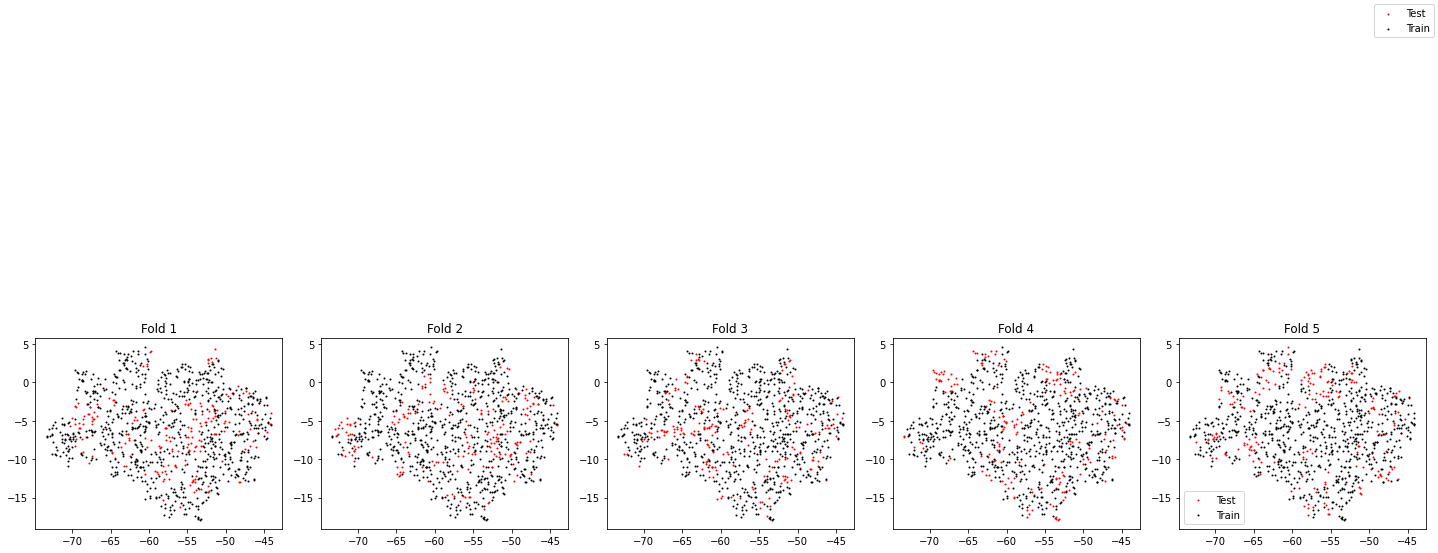

In [216]:

fig, axs = plt.subplots(1, n_folds, figsize=(20, 12))
marker_size = 1
for i in range(n_folds):
    ax = axs[i]

    this_train_inds = city_cv[i][0]
    this_test_inds = city_cv[i][1]
    XYs[this_test_inds].plot(ax=ax, color = 'red', markersize=marker_size, label = 'Test')
    XYs[this_train_inds].plot(ax=ax, color = 'black', markersize=marker_size, label = 'Train')
    ax.set_title(f"Fold {i+1}")

#plt.suptitle(f'{n_folds}-Fold Spatial Cross Validation ') 
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels)   
plt.legend()
plt.tight_layout()
plt.show()






In [ ]:
f, ax = plt.subplots(1, figsize=(8,8))

In [ ]:
f, ax = plt.subplots(1, figsize=(8,8))

construct_blocks(XYs, method='optimized_random', data = X, tiles_x=15, tiles_y=5, n_groups=2).plot(column='grid_id', cmap='Set2', ax=ax,
                                                                                          edgecolor='black', aspect = 1)

XYs.plot(color='black', ax=ax, markersize=0.1)
ax.axis('off')

<AxesSubplot:>

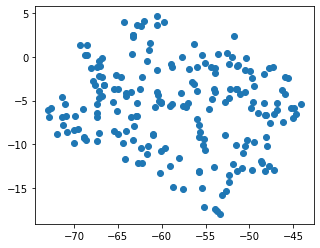

In [196]:
XYs[this_test].plot()

In [189]:
i = 0

this_train = city_cv[i][0]

this_test = city_cv[i][1]

In [192]:
df_full

,Unnamed: 0,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,...,water,soybean,rice,other_crop,coffee,citrus,other_perennial,forest_lag,forest_diff,def
0,1562090,1500503.0,0.0,9013048,-54.825,1.425,2013,97.0,97.00,31.51044,...,0.000000,0.000000,0.0,0.000000,0,0,0.0,3.142859,0.000000,0.000000
1,1407121,1500602.0,1.0,9131694,-53.175,-8.225,2012,83.0,84.50,30.87683,...,0.000000,0.000000,0.0,0.000000,0,0,0.0,3.075358,0.000000,0.000000
2,1167689,1100122.0,31.0,8505111,-61.875,-10.425,2011,52.0,63.00,29.12990,...,0.000000,0.000000,0.0,0.000000,0,0,0.0,2.817710,0.006378,0.000000
3,194195,1300805.0,21.0,8692435,-59.275,-5.025,2005,67.0,75.00,31.46420,...,0.000000,0.000000,0.0,0.000000,0,0,0.0,3.120763,0.000000,0.000000
4,538148,1302108.0,-5.0,8048047,-68.225,-1.425,2007,97.0,97.00,35.93944,...,0.000000,0.000000,0.0,0.000000,0,0,0.0,3.143062,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1872787,1304104.0,3.0,8386363,-63.525,-6.825,2015,94.0,93.50,25.77332,...,0.000000,0.000000,0.0,0.000000,0,0,0.0,3.100490,0.000000,0.000000
996,376545,1302306.0,-5.0,8076794,-67.825,-4.125,2006,97.0,94.75,33.57883,...,0.734275,0.000000,0.0,0.000000,0,0,0.0,2.360846,-0.000892,0.000892
997,346242,1200179.0,-4.0,8076667,-67.825,-10.475,2006,92.0,84.75,24.83917,...,0.000000,0.000000,0.0,0.000000,0,0,0.0,2.861686,-0.021839,0.021839
998,2128765,5107768.0,-6.0,8965936,-55.475,-13.775,2016,60.0,46.25,27.66026,...,0.000000,0.000000,0.0,0.011296,0,0,0.0,1.449594,0.003476,0.000000


200

In [10]:
from sklearn.model_selection import train_test_split
import spacv
from spacv.grid_builder import *
from spacv.utils import *
import geopandas as gpd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [168]:
df_full = df_full.sample(1000).reset_index(drop=True)

Y = df_full['forest_diff']
X = df_full[X_cols]

gdf = gpd.GeoDataFrame(X, geometry = gpd.points_from_xy(df_full.x, df_full.y))

XYs = gdf['geometry']

X = gdf[X_cols].values
Y = Y.values



In [180]:
scv = spacv.SKCV(n_splits = 2, buffer_radius = 0.1)
list(scv.split(XYs))[0]

(array([  2,   3,   4,   9,  10,  15,  16,  17,  18,  19,  20,  22,  26,
         27,  30,  31,  36,  41,  42,  46,  47,  48,  50,  51,  53,  54,
         61,  62,  65,  66,  67,  68,  69,  70,  77,  83,  86,  90,  92,
         94,  95,  96,  98,  99, 102, 103, 107, 111, 112, 113, 116, 118,
        124, 127, 129, 130, 134, 135, 136, 137, 139, 144, 145, 147, 149,
        153, 155, 158, 159, 160, 161, 162, 163, 164, 171, 174, 175, 178,
        180, 181, 182, 183, 185, 186, 189, 192, 196, 197, 203, 207, 212,
        215, 216, 218, 219, 222, 223, 225, 230, 232, 233, 234, 237, 239,
        240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 255,
        257, 261, 264, 267, 271, 273, 275, 277, 278, 281, 284, 285, 287,
        291, 296, 298, 299, 301, 305, 308, 310, 311, 318, 319, 322, 326,
        327, 328, 329, 331, 335, 336, 341, 344, 348, 352, 353, 354, 355,
        358, 360, 362, 368, 369, 370, 371, 372, 373, 374, 375, 380, 382,
        387, 389, 391, 394, 396, 397, 401, 403, 404

In [161]:
fold_train, fold_test = [], []
for train, test in scv.split(XYs):
    fold_train.append(train)
    fold_test.append(test)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [156]:
skcv = spacv.SKCV(n_splits=4, buffer_radius=10).split(XYs)

In [157]:
skcv

<generator object BaseSpatialCV.split at 0x7fa8815586d0>

In [146]:
print(gdf.shape, X.shape, Y.shape, XYs.shape)

(1000, 207) (1000, 206) (1000,) (1000,)


/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/spacv/grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa94ec4d280>
Traceback (most recent call last):
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attr

(-74.78499999999998, -42.665, -19.052500000000013, 5.7525)

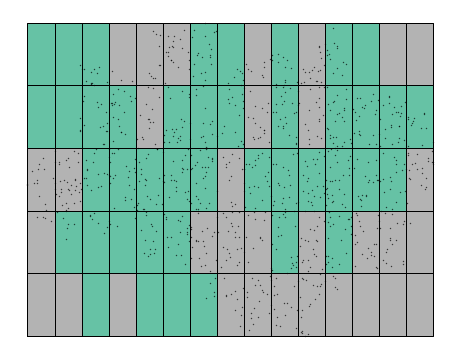

In [155]:
f, ax = plt.subplots(1, figsize=(8,8))

construct_blocks(XYs, method='optimized_random', data = X, tiles_x=15, tiles_y=5, n_groups=2).plot(column='grid_id', cmap='Set2', ax=ax,
                                                                                          edgecolor='black', aspect = 1)

XYs.plot(color='black', ax=ax, markersize=0.1)
ax.axis('off')

In [15]:


skcv = spacv.SKCV(n_splits=4, buffer_radius=10).split(XYs)

svc = SVC()

# cross_val_score(svc, 
#                 X, 
#                 Y, 
#                 cv = skcv)

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# clf = GridSearchCV(estimator=svc, 
#                    param_grid=parameters, 
#                    cv = skcv # An iterable yielding (train, test) splits as arrays of indices
#                   )

# clf.fit(X, y)

In [57]:
gdf.head()

,year,rain1,elevation,slope,aspect,near_mines,near_roads,near_hidrovia,indigenous_homol,mun_election_year,...,mining,water,soybean,rice,other_crop,coffee,citrus,other_perennial,forest_lag,geometry
32874,2006,32.84518,201.0,0.0,13.0,727473.20,71893.64,38320.64,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3.093685,POINT (-71.32500 -7.32500)
7621,2005,24.41961,356.0,1.0,348.0,632615.90,112109.90,112131.90,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3.032662,POINT (-70.57500 -10.92500)
4469,2006,28.59984,216.0,3.0,34.0,96375.89,39549.64,80791.44,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,2.950794,POINT (-62.67500 -12.07500)
107314,2012,33.80427,129.0,1.0,250.0,56963.14,22774.36,61037.07,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3.120780,POINT (-55.92500 -5.02500)
85374,2004,27.75583,185.0,1.0,283.0,89169.23,27207.98,111422.50,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3.126544,POINT (-51.17500 -4.37500)


In [83]:
print(type(gdf))
print(type(X))
print(type(Y))
print(type(XYs))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'geopandas.geoseries.GeoSeries'>


In [148]:
print(gdf.shape, X.shape, Y.shape, XYs.shape)

(1000, 207) (1000, 206) (1000,) (1000,)


In [89]:
from sklearn.neighbors import BallTree

In [86]:
def assign_randomized(grid, n_groups=5, random_state=None):
    """
    Set grid pattern as randomized by randomly assigning grid IDs.
    """
    np.random.seed(random_state)
    
    # Determine number of randomized groups
    n_random_grps = np.arange(0, n_groups)
    n_grids = grid.shape[0]
    
    # Allocate random group id to each grid row
    grid_id = np.random.choice(n_random_grps, size=n_grids, replace=True)
    
    return grid_id

In [88]:
def assign_pt_to_grid(XYs, grid, distance_metric='euclidean', random_state=None):
    """
    Spatial join pts to grids. Reassign border points to nearest grid based on centroid distance. 
    """
    np.random.seed(random_state)
    XYs = convert_geodataframe(XYs)   
    # Equate spatial reference systems if defined 
    if not grid.crs == XYs.crs:
        grid.crs = XYs.crs        
    XYs = gpd.sjoin(XYs, grid, how='left' , op='within')[['geometry', 'grid_id']]
        
    # In rare cases, points will sit at the border separating two grids
    if XYs['grid_id'].isna().any():
        # Find border pts and assign to nearest grid centroid
        grid_centroid = grid.geometry.centroid
        grid_centroid = geometry_to_2d(grid_centroid)
        border_pt_index = XYs['grid_id'].isna()
        border_pts = XYs[border_pt_index].geometry
        border_pts = geometry_to_2d(border_pts)      
        
        # Update border pt grid IDs
        tree = BallTree(grid_centroid, metric=distance_metric) 
        grid_id  = tree.query(border_pts, k=1, return_distance=False).flatten()
        grid_id = grid.loc[grid_id, 'grid_id'].values
        XYs.loc[border_pt_index, 'grid_id'] = grid_id
    return XYs

In [87]:
def assign_optimized_random(grid, XYs, data, n_groups=5, n_sims=10, distance_metric='euclidean'):
    """
    Set grid pattern as optimized random by taking grid IDs that minimize dissimilarity between folds.
    """
    if data is None:
        raise ValueError(
            "Data must be supplied to spacv.HBLOCK() for computing fold"
            " dissimilarity when using optimized_random method."
        )
    data = convert_numpy(data)
    # Build dictionary of grid IDs with paired SSR for dissimilarity 
    optimized_grid = {}
    for sim in range(n_sims):
        grid_id = assign_randomized(grid, n_groups)
        grid['grid_id'] = grid_id
        folds = assign_pt_to_grid(XYs, grid, distance_metric)

        # Scale for SSR calculation
        X = (data - data.mean(axis=0)) / data.std(axis=0)
        Xbar = X.mean(axis=0)
        X_grid_means = np.array([ X[v].mean(axis=0) 
                                     for _, v in folds.groupby('grid_id').groups.items()])
        # Calculate dissimilarity between folds and mean values across all data 
        sse = sum(
            sum((X_grid_means - Xbar)**2)
        )
        optimized_grid.update( {sim : {'sse': sse, 'grid_id': grid_id}} )

    # Take the optimized grid as one that minimises dissimilarity between folds
    minimised_obj = min(optimized_grid, key = lambda x : optimized_grid[x]['sse'])
    grid_id = optimized_grid[minimised_obj]['grid_id']
    return grid_id

In [91]:
def assign_systematic(grid, tiles_x, tiles_y, direction='diagonal'):
    """
    Set grid pattern as systematic by assigning grid IDs along diagonals, normal and anti-diagonal.
    """
    # Reshape length of grid to matrix
    sys_matrix = np.arange(0, tiles_x * tiles_y) \
                   .reshape(tiles_y, tiles_x)
    length, width = sys_matrix.shape

    # Set systematic pattern, diagonal or anti-diagonal
    if direction == 'diagonal':
        diags = [sys_matrix.diagonal(i) 
                     for i in range(width-1, -length,-1)]
    elif direction == 'anti':
        diags = [sys_matrix[::-1,:].diagonal(i) 
                     for i in range(-length+1, width)]
    else:
        raise ValueError("Direction of systematic pattern not recognised. Choose between: diagonal or anti.")

    # Construct lookup between diagonal element indices and grid dataframe
    systematic_lookup = dict([
                            tuple([element, key]) 
                                for key, diag in enumerate(diags) 
                                    for element in diag
                        ])
    grid_id = grid.index.map(systematic_lookup)

    return grid_id

In [90]:
def construct_grid(XYs, tiles_x, tiles_y, shape):
    """
    Choose grid shape to build across bounds of study area.
    """
    if shape == 'square':
        return construct_square_grid(XYs, tiles_x, tiles_y)
    if shape == 'hex':
        return construct_hex_grid(XYs, tiles_x, tiles_y)

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/spacv/grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa94ec4d280>
Traceback (most recent call last):
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attr

(-74.78499999999998, -42.665, -19.052500000000013, 5.7525)

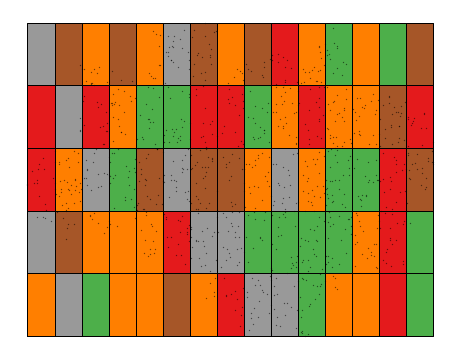

In [149]:
f, ax = plt.subplots(1, figsize=(8,8))

construct_blocks(XYs, method='optimized_random', data = X, tiles_x=15, tiles_y=5, direction='anti').plot(column='grid_id', cmap='Set1', ax=ax,
                                                                                          edgecolor='black', aspect = 1)

XYs.plot(color='black', ax=ax, markersize=0.05)
ax.axis('off')

In [147]:
shape = 'square'
tiles_x = 10
tiles_y = 10
method = 'optimized_random'
direction = 'anti'
n_groups = 5
random_state = 0
data = X
n_sims = 10
distance_metric='euclidean'
############################

grid = construct_grid(XYs, tiles_x, tiles_y, shape)

# Set grid assignment method
if method == 'unique':
    grid['grid_id'] = grid.index
elif method == 'systematic':
    if shape != 'square':
        raise Exception("systematic grid assignment method does not work for irregular grids.")
    grid['grid_id'] = assign_systematic(grid, tiles_x, tiles_y, direction)
elif method == 'random':
    grid['grid_id'] = assign_randomized(grid, n_groups, random_state)
elif method == 'optimized_random':
    grid['grid_id'] = assign_optimized_random(grid, XYs, data, 
                                                            n_groups,
                                                            n_sims, 
                                                            distance_metric)

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/spacv/grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa94ec4d280>
Traceback (most recent call last):
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attr

In [ ]:

    """
    Set grid pattern as optimized random by taking grid IDs that minimize dissimilarity between folds.
    """
    if data is None:
        raise ValueError(
            "Data must be supplied to spacv.HBLOCK() for computing fold"
            " dissimilarity when using optimized_random method."
        )
    data = convert_numpy(data)
    
    # Build dictionary of grid IDs with paired SSR for dissimilarity 
    optimized_grid = {}
    for sim in range(n_sims):
        grid_id = assign_randomized(grid, n_groups)
        grid['grid_id'] = grid_id
        folds = assign_pt_to_grid(XYs, grid, distance_metric)

        # Scale for SSR calculation
        X = (data - data.mean(axis=0)) / data.std(axis=0)
        Xbar = X.mean(axis=0)
        X_grid_means = np.array([ X[v].mean(axis=0) 
                                     for _, v in folds.groupby('grid_id').groups.items()])
        # Calculate dissimilarity between folds and mean values across all data 
        sse = sum(
            sum((X_grid_means - Xbar)**2)
        )
        optimized_grid.update( {sim : {'sse': sse, 'grid_id': grid_id}} )

    # Take the optimized grid as one that minimises dissimilarity between folds
    minimised_obj = min(optimized_grid, key = lambda x : optimized_grid[x]['sse'])
    grid_id = optimized_grid[minimised_obj]['grid_id']
 

In [115]:
folds.shape

(10000, 2)

In [ ]:
folds

In [139]:
X.shape

(1000, 206)

In [122]:
len(folds.groupby('grid_id').groups.items())

5

In [105]:
optimized_grid = {}
for sim in range(n_sims):
    print(sim)
    grid_id = assign_randomized(grid, n_groups)

    grid['grid_id'] = grid_id
    folds = assign_pt_to_grid(XYs, grid, distance_metric)

    # Scale for SSR calculation
    X = (data - data.mean(axis=0)) / data.std(axis=0)
    Xbar = X.mean(axis=0)
    X_grid_means = np.array([ X[v].mean(axis=0) for _, v in folds.groupby('grid_id').groups.items()])
    
    # Calculate dissimilarity between folds and mean values across all data 
    sse = sum(
        sum((X_grid_means - Xbar)**2)
    )
    optimized_grid.update( {sim : {'sse': sse, 'grid_id': grid_id}} )


0


/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3319: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-105-2f53b115e38d>:9: RuntimeWarning: invalid value encountered in true_divide
  X = (data - data.mean(axis=0)) / data.std(axis=0)


IndexError: index 91170 is out of bounds for axis 0 with size 1000

In [114]:
list(folds.groupby('grid_id').groups.items())[0]

(0.0,
 Int64Index([ 91170,  32601, 129237, 155563,  78142,  63736,  76086,  42882,
              99619,  77210,
             ...
             134595,  77322, 165307,  87571,  81576,  75742, 110030,  77809,
              78504,  43275],
            dtype='int64', length=1282))

In [ ]:
[ X[v].mean(axis=0) for _, v in folds.groupby('grid_id').groups.items()]

In [106]:
np.array([ X[v].mean(axis=0) for _, v in folds.groupby('grid_id').groups.items()])

IndexError: index 91170 is out of bounds for axis 0 with size 1000

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/spacv/grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa94ec4d280>
Traceback (most recent call last):
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attr

IndexError: index 106970 is out of bounds for axis 0 with size 1000

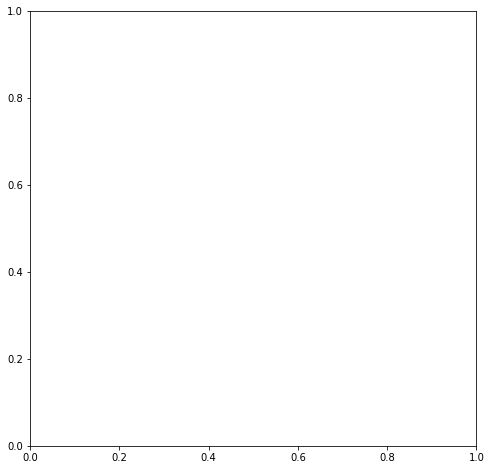

In [85]:
f, ax = plt.subplots(1, figsize=(8,8))

construct_blocks(XYs, method='optimized_random', data = X, tiles_x=15, tiles_y=5, direction='anti').plot(column='grid_id', cmap='Set1', ax=ax,
                                                                                          edgecolor='black', aspect = 1)

XYs.plot(color='black', ax=ax, markersize=0.05)
ax.axis('off')

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/spacv/grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa94ec4d280>
Traceback (most recent call last):
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attr

(-75.4175, -42.58249999999999, -19.065000000000012, 6.015000000000001)

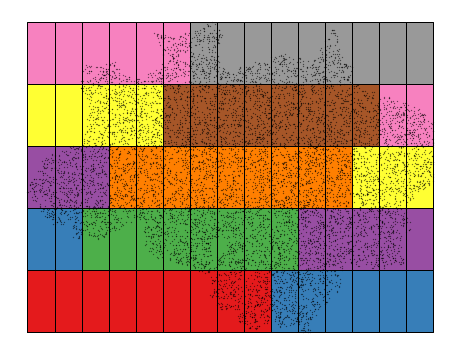

In [68]:
f, ax = plt.subplots(1, figsize=(8,8))

construct_blocks(XYs, method='unique', tiles_x=15, tiles_y=5, direction='anti').plot(column='grid_id', cmap='Set1', ax=ax,
                                                                                          edgecolor='black')

XYs.plot(color='black', ax=ax, markersize=0.05)
ax.axis('off')

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/spacv/grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa94ec4d280>
Traceback (most recent call last):
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attr

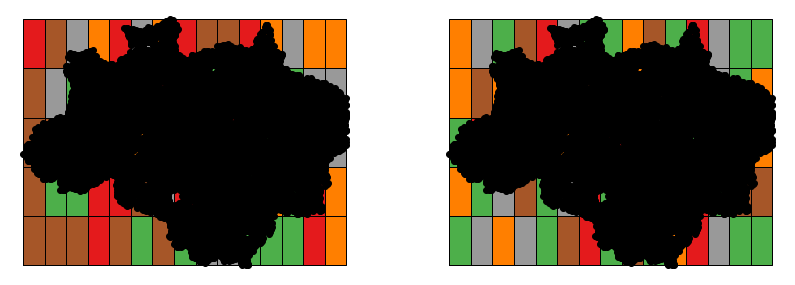

In [60]:
f, ax = plt.subplots(1,2, figsize=(14,12))

construct_blocks(XYs, method='random', tiles_x=15, tiles_y=5, direction='anti').plot(column='grid_id', cmap='Set1', 
                                                                                         ax=ax[0], edgecolor='black')
construct_blocks(XYs, method='random', tiles_x=15, tiles_y=5, direction='diagonal').plot(column='grid_id', cmap='Set1', 
                                                                                             ax=ax[1], edgecolor='black')
XYs.plot(ax=ax[0], color='black')
#XYs.plot(ax=ax[1], color='black')
ax[0].axis('off'), ax[1].axis('off');

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/spacv/grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa94ec4d280>
Traceback (most recent call last):
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attr

IndexError: index 157291 is out of bounds for axis 0 with size 10000

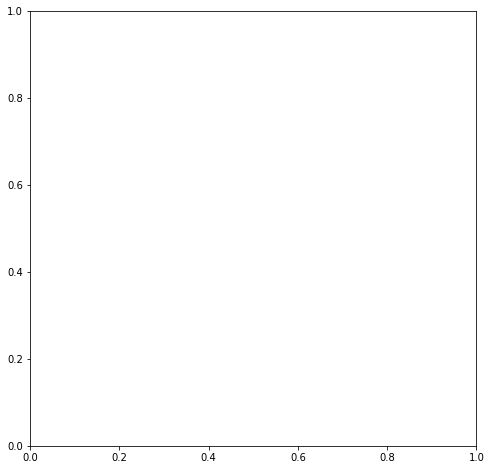

In [49]:
f, ax = plt.subplots(1, figsize=(8,8))

construct_blocks(XYs, method='optimized_random', data=X, tiles_x=25, tiles_y=25, 
                 n_groups=3, n_sims=10, distance_metric='euclidean').plot(column='grid_id', ax=ax, cmap='viridis', edgecolor='black')


#df_full.plot(ax=ax, color='black')
ax.axis('off');

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__max_depth':np.arange(3,11,8) },
                      cv = 5, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [ ]:
search.fit(X_train,Y_train)

In [ ]:
search.best_params_

In [ ]:
model = RandomForestRegressor(n_estimators = 500, max_depth = search.best_params_['model__max_depth'])
model.fit(X_train, Y_train)

In [ ]:
importances = search.best_estimator_._final_estimator.feature_importances_[np.argsort(np.array(abs(search.best_estimator_._final_estimator.feature_importances_)))[::-1][0:9]]


In [ ]:
print(X.columns[np.argsort(np.array(abs(search.best_estimator_._final_estimator.feature_importances_)))[::-1][0:9]])

In [ ]:
np.sort(np.array(abs(search.best_estimator_._final_estimator.feature_importances_)))[::-1][0:9]